# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Load-and-subset-the-dataset" data-toc-modified-id="Load-and-subset-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load and subset the dataset</a></div><div class="lev2 toc-item"><a href="#analysis-of-countries--fields" data-toc-modified-id="analysis-of-countries--fields-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>analysis of countries  fields</a></div><div class="lev3 toc-item"><a href="#countries-field" data-toc-modified-id="countries-field-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span><code>countries</code> field</a></div><div class="lev3 toc-item"><a href="#countries_tags-field" data-toc-modified-id="countries_tags-field-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span><code>countries_tags</code> field</a></div><div class="lev3 toc-item"><a href="#countries_en-field" data-toc-modified-id="countries_en-field-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span><code>countries_en</code> field</a></div><div class="lev2 toc-item"><a href="#subsetting-swiss-products" data-toc-modified-id="subsetting-swiss-products-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>subsetting swiss products</a></div><div class="lev2 toc-item"><a href="#reload-the-swiss_OFF" data-toc-modified-id="reload-the-swiss_OFF-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>reload the swiss_OFF</a></div><div class="lev2 toc-item"><a href="#cross-check-with-openfood.ch-products" data-toc-modified-id="cross-check-with-openfood.ch-products-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>cross check with openfood.ch products</a></div><div class="lev3 toc-item"><a href="#cross-check-by--product_name" data-toc-modified-id="cross-check-by--product_name-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>cross-check by  product_name</a></div><div class="lev3 toc-item"><a href="#cross-check-by--barcode" data-toc-modified-id="cross-check-by--barcode-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>cross-check by  barcode</a></div><div class="lev2 toc-item"><a href="#remove-outliers" data-toc-modified-id="remove-outliers-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>remove outliers</a></div><div class="lev2 toc-item"><a href="#check-that-nutrients--looks-similar-to-openfood.ch" data-toc-modified-id="check-that-nutrients--looks-similar-to-openfood.ch-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>check that nutrients  looks similar to openfood.ch</a></div><div class="lev1 toc-item"><a href="#Analysis-of-tags" data-toc-modified-id="Analysis-of-tags-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis of tags</a></div><div class="lev2 toc-item"><a href="#other-tags" data-toc-modified-id="other-tags-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>other tags</a></div><div class="lev2 toc-item"><a href="#category-tags" data-toc-modified-id="category-tags-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>category tags</a></div><div class="lev1 toc-item"><a href="#OTHER-CODE" data-toc-modified-id="OTHER-CODE-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OTHER CODE</a></div>

<center>
    <big>
        <b>
        
        
            Here we import the swiss products of the 
            [open food facts dataset](https://world.openfoodfacts.org/data)
            
        </b>
    </big>
</center>

In [1]:
import pandas as pd
import numpy as np

# modules for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

# modules for stats
from scipy import stats
import powerlaw
import itertools as itt

# to save memory
import gc

# Load and subset the dataset

In [49]:
full_off_df = pd.read_csv('/Users/lazzari/Downloads/en.openfoodfacts.org.products.csv',sep='\t')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,3,5,26,27,28,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## analysis of countries  fields

(where the product was sold)

Here is a [description of all the fields](https://world.openfoodfacts.org/data/data-fields.txt).   
We hereby analyze the ones concerning the country
( we are interested only in products _sold in  Switzerland_)

[here is an example](https://world.openfoodfacts.org/product/7610818970506/amandes-entieres-naturaplan)
of product from [openfood.ch](https://www.openfood.ch/en/products/996)

### `countries` field

In [30]:
print('# unique countries:',full_off_df.countries.nunique() )
full_off_df.countries.unique()

# unique countries: 1311


array(['en:FR', 'France', 'en:GB', ..., 'Malaisie', 'en:HK, en:france',
       'Hong Kong,China'], dtype=object)

In [29]:
print(sum(full_off_df.countries=='Suisse'))

print(sum(full_off_df.countries=='Schweiz'))

print(sum(full_off_df.countries=='Switzerland'))

12299
125
361


In [19]:
# there is only 1 product with the italian version of the coutry name

full_off_df.loc[full_off_df.countries=='Svizzera',['code','product_name']]

,code,product_name
110511,7610900130108,Latte drink Emmi


### `countries_tags` field

In [20]:
full_off_df.countries_tags.nunique()

650

In [32]:
sum(full_off_df.countries_tags=='en:switzerland')

14792

### `countries_en` field

In [26]:
full_off_df.countries_en.nunique()

645

In [28]:
sum(full_off_df.countries_en=='Switzerland')

14792

## subsetting swiss products

In [ ]:
swiss_OFF_df = full_off_df.loc[full_off_df.countries_en=='Switzerland',:]

# save to csv 
swiss_OFF_df.to_csv(path_or_buf='./important_datasets/swiss_OFF_df.csv')

# save space 
del full_off_df
gc.collect()

swiss_OFF_df.info(memory_usage='deep')

## reload the swiss_OFF

In [4]:
swiss_OFF_df = pd.DataFrame.from_csv('./important_datasets/swiss_OFF_df.csv')
swiss_OFF_df.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (1,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


(14792, 161)

## cross check with openfood.ch products

In [5]:
food_df = pd.read_csv('./food_table.csv')
food_df.shape

(14839, 47)

### cross-check by  product_name

first check, how name _complete name_ we have, in both data-frames:

In [6]:
print(swiss_OFF_df.product_name.notnull().sum())
print(food_df.name.notnull().sum())

11074
12272


mind that __ names are not unique__:

In [7]:
print(swiss_OFF_df.product_name.dropna().nunique())
print(food_df.name.dropna().nunique())

10306
11885


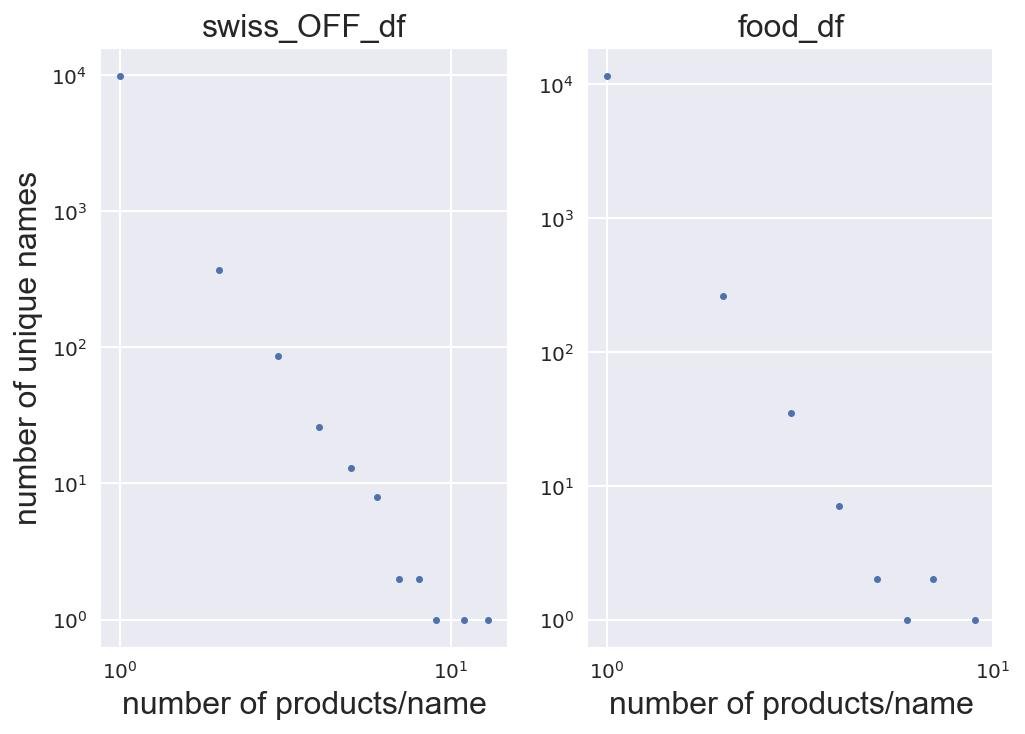

In [9]:
plt.subplot(1,2,1)

plt.loglog(swiss_OFF_df.product_name.value_counts().value_counts(),marker='.',linestyle='')
plt.title('swiss_OFF_df',size=16)
plt.xlabel('number of products/name',size=16)
plt.ylabel('number of unique names',size=16)

plt.subplot(1,2,2)

plt.loglog(food_df.name.value_counts().value_counts(),marker='.',linestyle='')
plt.title('food_df',size=16)
plt.xlabel('number of products/name',size=16);

only __ ~ 15% __ of the  products match ...:

In [11]:
# [print(p) for p in food_df.name.dropna().unique()[:100] if p in swiss_OFF_df.product_name.dropna().unique()]

%time sum([p in swiss_OFF_df.product_name.dropna().unique() for p in food_df.name.dropna().unique()])

CPU times: user 22.3 s, sys: 41.9 ms, total: 22.4 s
Wall time: 22.4 s


1721

### cross-check by  barcode

barcode have __no duplicates__ in both dfs (fortunately!)

In [17]:
print(swiss_OFF_df.code.nunique()==swiss_OFF_df.shape[0])
print(food_df.barcode.nunique()==food_df.shape[0])

True
True


( no null values)

In [18]:
print(swiss_OFF_df.code.isnull().sum())
print(food_df.barcode.isnull().sum())

0
0


how many of _openfood.ch_ products are in _open food facts_ ?

In [26]:
%time sum([b in swiss_OFF_df.code.values for b in food_df.barcode.values])

CPU times: user 3.95 s, sys: 6.16 ms, total: 3.95 s
Wall time: 3.95 s


5316

of course, if _makes more sense_ to perform the intersection _by barcode_:

In [39]:
checked_swiss_OFF_df = swiss_OFF_df.loc[swiss_OFF_df.code.isin(food_df.barcode),:]

checked_swiss_OFF_df.shape

(5316, 161)

In [40]:
# save space
del swiss_OFF_df
del food_df
gc.collect()

35404

## remove outliers

In [56]:
checked_swiss_OFF_df = checked_swiss_OFF_df.loc[(checked_swiss_OFF_df.energy_100g<4000) &
                                            (checked_swiss_OFF_df.fat_100g<=100) &
                                            (checked_swiss_OFF_df.proteins_100g<=100) &
                                            (checked_swiss_OFF_df.carbohydrates_100g<=100),:]
checked_swiss_OFF_df.shape

(3905, 161)

## check that nutrients  looks similar to openfood.ch 

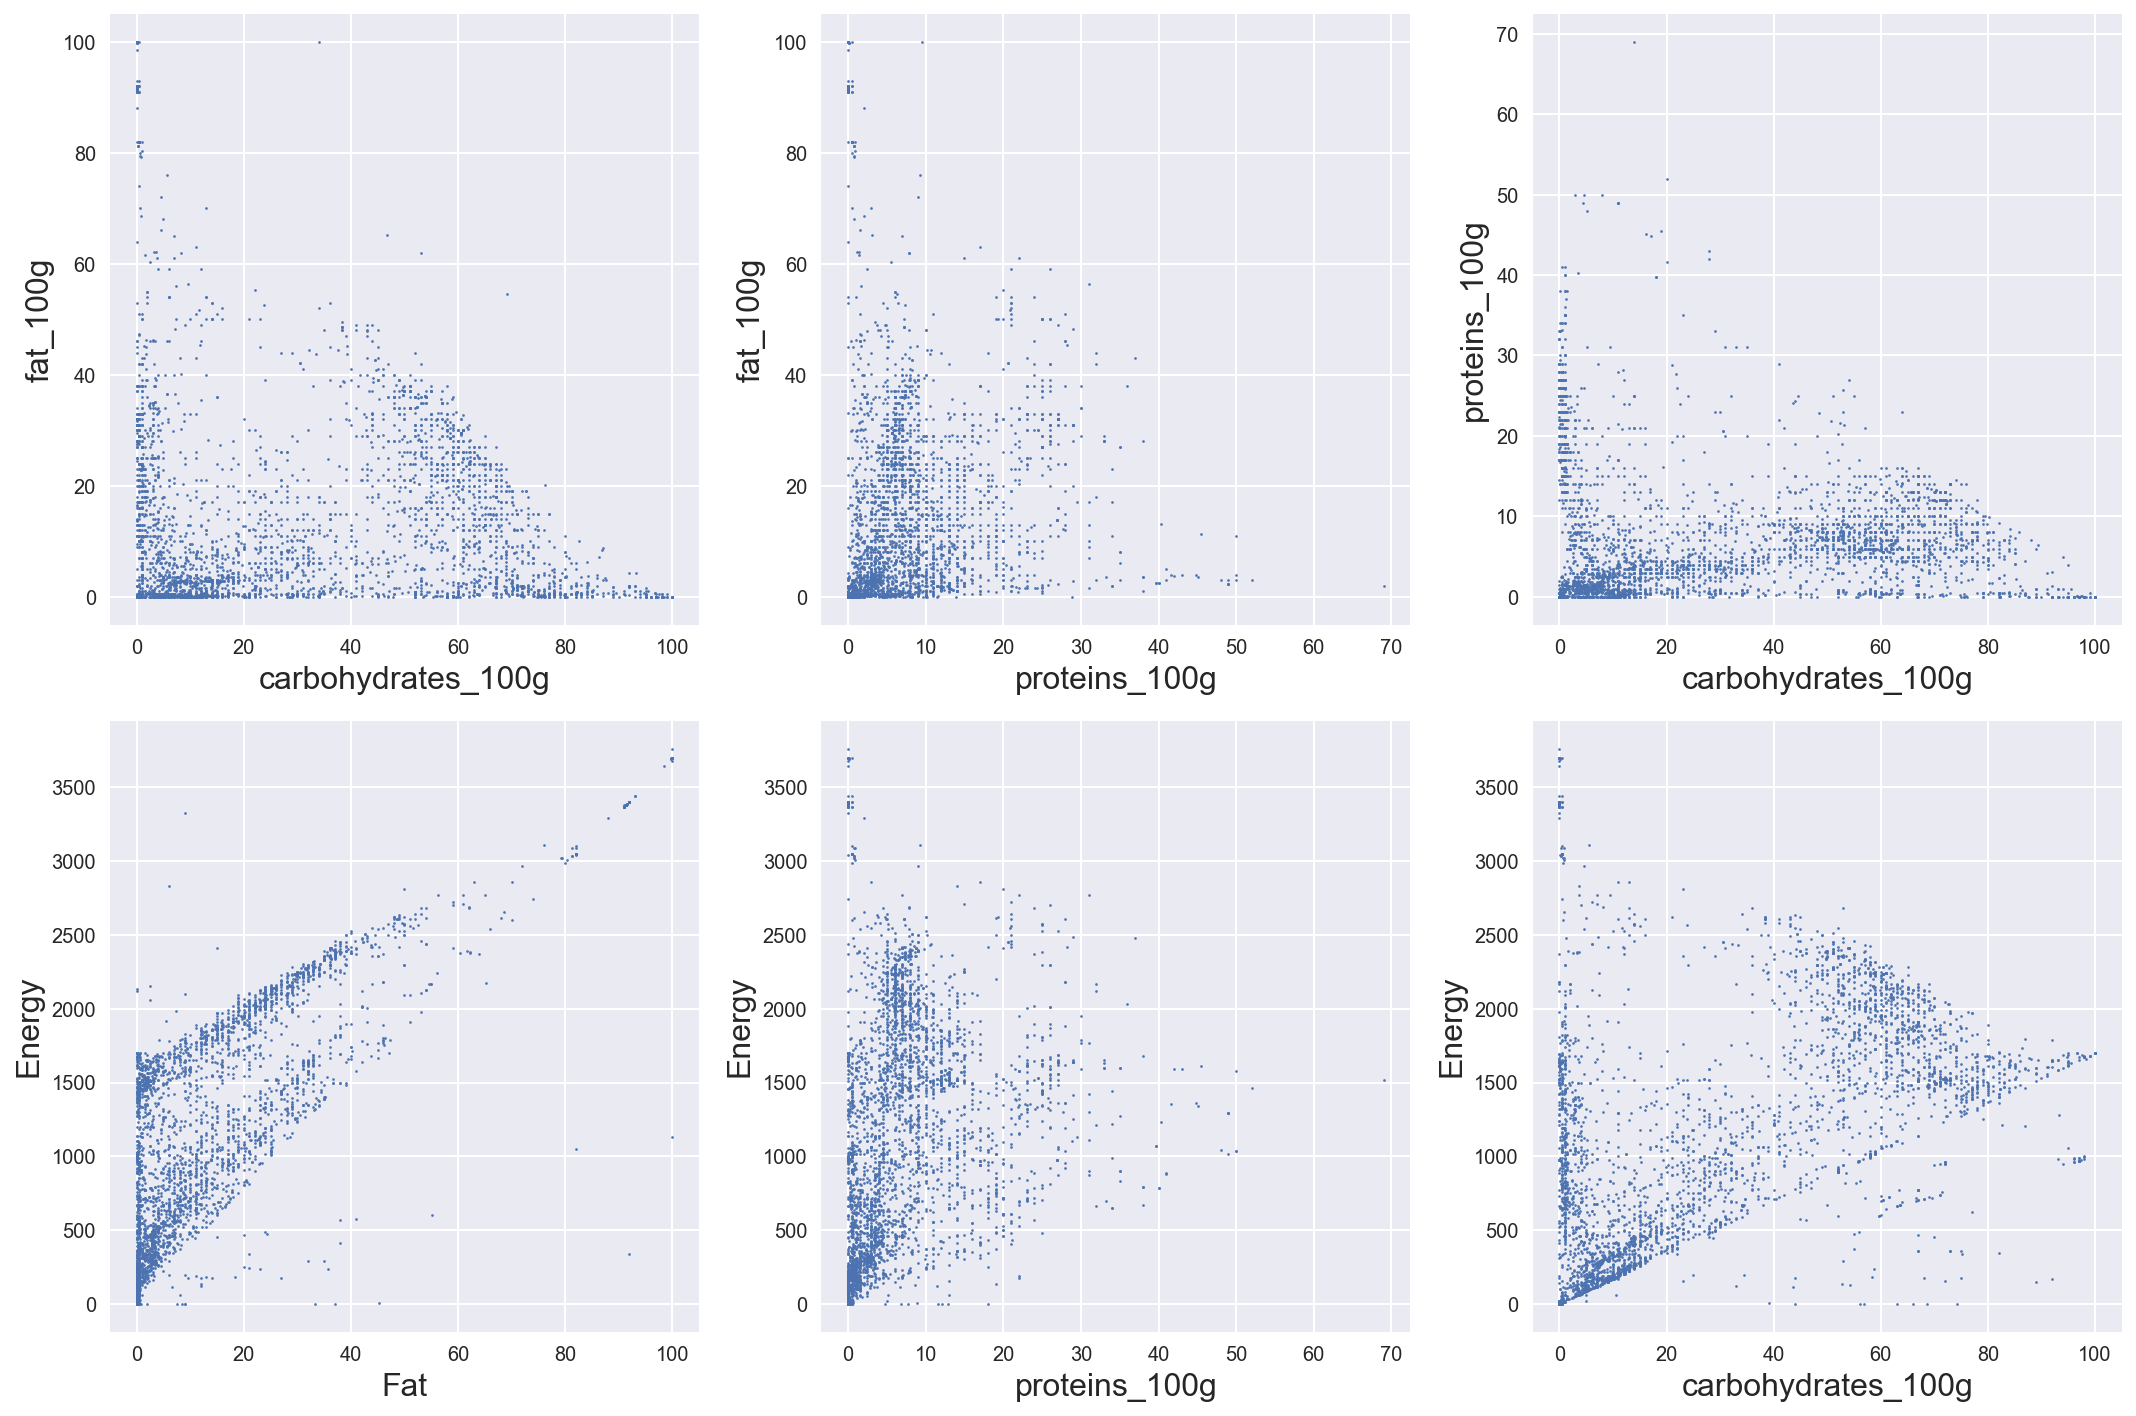

In [72]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.scatter(checked_swiss_OFF_df.carbohydrates_100g,checked_swiss_OFF_df.fat_100g,s=1) 
plt.xlabel('carbohydrates_100g',size=16)
plt.ylabel('fat_100g',size=16)


plt.subplot(2,3,2)
plt.scatter(checked_swiss_OFF_df.proteins_100g,checked_swiss_OFF_df.fat_100g,s=1) 
plt.xlabel('proteins_100g',size=16)
plt.ylabel('fat_100g',size=16)


plt.subplot(2,3,3)
plt.scatter(checked_swiss_OFF_df.carbohydrates_100g,checked_swiss_OFF_df.proteins_100g,s=1) 
plt.xlabel('carbohydrates_100g',size=16);
plt.ylabel('proteins_100g',size=16)

plt.subplot(2,3,4)
plt.scatter(checked_swiss_OFF_df.fat_100g,checked_swiss_OFF_df.energy_100g,s=1) 
plt.ylabel('Energy',size=16)
plt.xlabel('Fat',size=16)

plt.subplot(2,3,5)
plt.scatter(checked_swiss_OFF_df.proteins_100g,checked_swiss_OFF_df.energy_100g,s=1) 
plt.ylabel('Energy',size=16)
plt.xlabel('proteins_100g',size=16)

plt.subplot(2,3,6)
plt.scatter(checked_swiss_OFF_df.carbohydrates_100g,checked_swiss_OFF_df.energy_100g,s=1) 
plt.ylabel('Energy',size=16)
plt.xlabel('carbohydrates_100g',size=16);


plt.tight_layout()

# Analysis of tags

## other tags
(not too interesting)

In [107]:
print(checked_swiss_OFF_df.origins_tags.nunique())
checked_swiss_OFF_df.origins_tags.unique()

39


array([nan, 'switzerland', 'schweiz', 'suisse', 'espagne',
       'suisse,switzerland', 'france', 'thailande', 'frankreich',
       'deutschland', 'germany', 'italy', 'europe', 'belgium', 'ethiopia',
       'ocean-pacifique,alaska', 'italien',
       'suisse,switzerland,netherlands', 'suisse,schweiz',
       'indonesien,italien,sudafrika,usa', 'thailand,amerika', 'italie',
       'hongrie', 'madagascar', 'republique-tcheque', 'china', 'grece',
       'elabore-en-afrique-du-sud-ou-perou,emballe-en-espagne', 'migros',
       'pologne', 'suisse,etranger', 'czech-republic', 'switzerlandi',
       'union-europeenne', 'italia', 'viande-italienne', 'spain',
       'pays-bas', 'thailand', 'austria'], dtype=object)

In [106]:
print(checked_swiss_OFF_df.labels_en.nunique())
checked_swiss_OFF_df.labels_en.unique()

37


array([nan, 'Carbon footprint,Carbon footprint',
       'Carbon footprint,Carbon footprint,Carbon footprint',
       'Sustainable farming,UTZ Certified',
       'Sustainable farming,UTZ Certified,Carbon footprint,Carbon footprint',
       'FSC', 'Organic,Carbon footprint,Carbon footprint', 'Organic',
       'Low or no fat,Low fat,65% less fat,Reduced fat', 'Aha',
       'Incorrect data on label,Incorrect nutrition facts on label',
       'No preservatives', 'Low or no sugar,No added sugar',
       'Organic,Gluten-free,fr:Aha',
       'Sustainable fishery,Sustainable Seafood MSC',
       'Organic,de:Bio 7 Initiative',
       'Organic,EU Organic,de:Bio 7 Initiative,DE-ÖKO-001',
       'Organic,EU Organic', 'Bio-7-initiative',
       'Organic,FSC,de:Bio 7 Initiative,FSC-C014047,FSC Mix',
       'Organic,Vegetarian,EU Organic,Vegan,de:Bio 7 Initiative,DE-ÖKO-007,Vegan Society',
       'Green Dot', 'xx:Oeufs-de-ponte-au-sol', 'Suisse Garantie',
       'Fair trade,Max Havelaar', 'TerraSuisse

In [105]:
print(checked_swiss_OFF_df.purchase_places.nunique())
checked_swiss_OFF_df.purchase_places.unique()

24


array([nan, 'Gland,Suisse', 'Suisse', 'suisse', 'Vaud,Suisse',
       'Signy,suisse', 'Crans,Suisse', 'Genève, Suisse', 'Lausanne,Suisse',
       'Conthey, Suisse', 'Switzerland', 'Berlin', 'Vich,Suisse',
       'Nyon,Suisse', 'Signy,Suisse', 'Genève', 'Le Vaud,Suisse',
       'Broc,Suisse', 'Etoy,Signy', 'Genève,Suisse', 'Suisse,Vaud',
       'Etoy,Suisse', 'Lausanne', 'Nyons,Suisse',
       'Saint-Thibault-des-Vignes,France'], dtype=object)

In [104]:
print(checked_swiss_OFF_df.stores.nunique())
checked_swiss_OFF_df.stores.unique()

15


array([nan, 'Migros', 'migros', 'coop', 'Coop', 'Le Marché des Corbeaux',
       'REWE', 'Denner', 'Migros,Coop', 'Coop,Migros',
       'Epicerie de Le Vaud', 'Boutique Cailler', 'Le marché des Corbeaux',
       'Suisse', 'Dolce Italia', 'épicerie'], dtype=object)

## category tags

(mind that these are acutally _list_ of tags)

In [91]:
print(checked_swiss_OFF_df.categories_en.nunique())
checked_swiss_OFF_df.categories_en.unique()[:10]

154


array([nan, 'Yaourt', 'Dairies,Yogurts',
       'Dairies,Yogurts,Fruit yogurts,Blueberry yogurts',
       'Dairies,Yogurts,Flavoured yogurts', 'Desserts',
       'Plant-based foods and beverages,Plant-based foods,Pickles,Olive tree products,Plant-based pickles,Olives',
       'Plant-based foods and beverages,Plant-based foods,Pickles,Olive tree products,Plant-based pickles,Olives,Black olives',
       'Dairies', 'Dairies,Cheeses,Italian cheeses,Mozzarella'], dtype=object)

how many products have them?

In [114]:
checked_swiss_OFF_df.categories_en.notnull().sum()

259

In [113]:
print(checked_swiss_OFF_df.shape)

(3905, 161)


# OTHER CODE